# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [30]:
print("See my Github repo for the answers")

See my Github repo for the answers


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  Review Scores R

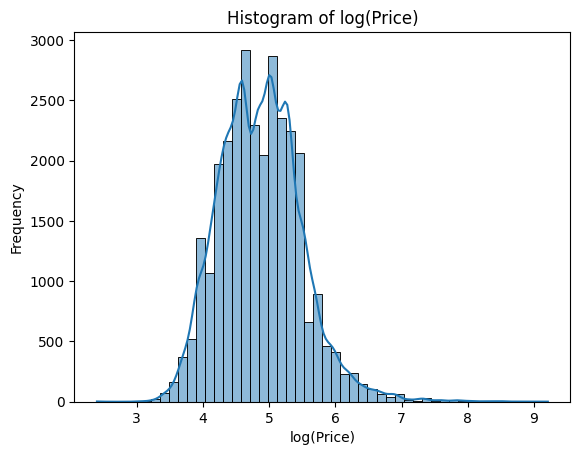

/tmp/ipython-input-2848941902.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price_log'], shade=True)


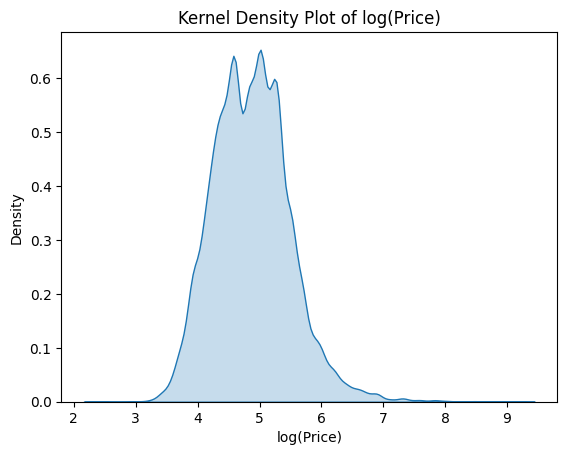

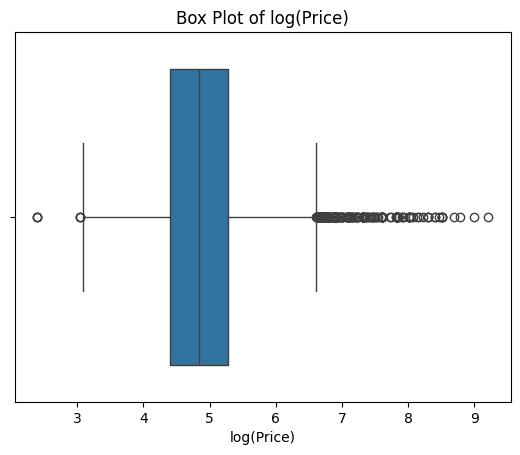

            Price                    
             mean          std  count
Beds                                 
0.0     92.000000    38.183766      2
1.0    127.673810   107.047827  20344
2.0    199.061271   225.706318   6610
3.0    268.118300   303.106942   2071
4.0    315.332056   353.184402    783
5.0    411.500000   672.610659    284
6.0    401.768362   417.018431    177
7.0    341.377778   220.116631     45
8.0    589.041667   793.054934     24
9.0    618.000000   233.649616     15
10.0   480.187500   296.820534     16
11.0   535.800000   499.217588      5
12.0  1418.750000  2388.285211      4
16.0   736.000000   496.804287     13


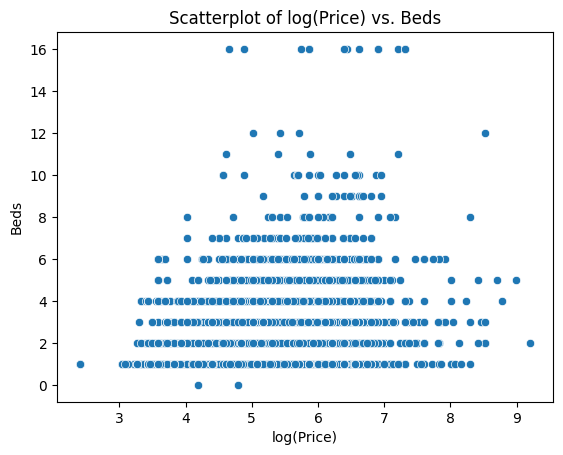

The scatterplot shows that listings with more beds have higher log prices (as expected), but the spread is wider as there are more beds. The groupby confirms this as average prices rise with bed count but the St.dev also grows. Smaller units are priced more consistently than more beds


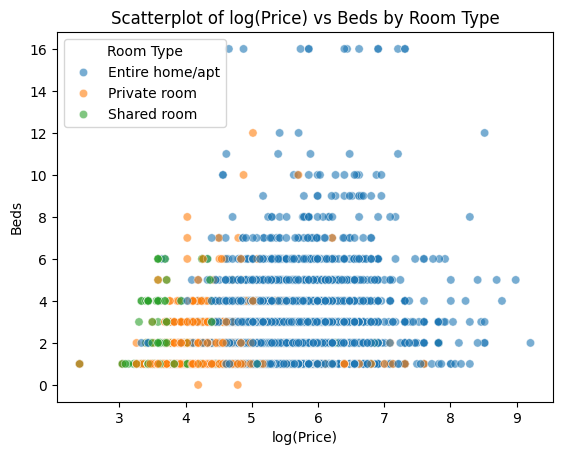

                                       mean  median          std  count
Room Type       Property Type                                          
Entire home/apt Other            843.428571   300.0  1133.062271     14
                Villa            529.750000   249.5   650.963581      4
                Loft             330.510204   225.0   321.519721    392
                Condominium      304.861111   200.0   266.197497     72
                House            297.263298   195.0   468.409428    752
                Townhouse        280.783133   190.0   314.605252     83
                Cabin            250.000000   250.0          NaN      1
                Apartment        213.224839   175.0   218.097834  15669
Private room    Other            211.931034   119.0   235.404505     29
Entire home/apt Bed & Breakfast  184.538462   130.0   119.814172     13
The scatterplot shows the entire homes and apartments have hgher log prices across all bed types. The grouped summary confirms this: the

In [29]:
#Q2.1: Load in the CSV File
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('airbnb_hw.csv')

#Q2.2: Data Examination
print(df.head())
print("The dimensions of the data is (the number of observations is just the number of rows)", df.shape, "and the variables included are", df.columns.tolist()) #used AI to make the.tolist just to make the index object not a big mess

#Q2.3: cross tabulate
cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab)
print("The Cross-tabulation shows that most rentals across property types are offered as entire homrs or apartments. For hourses nearly all are entire property. Apartments have a more balanced dist. with private rooms (10,748) being common alongside entire units (15,669). Share rooms are uncommon overall but they're mostly in apartments. Private rooms are more common in apartments than houses.")

#Q2.4: price histogram
print(df['Price'].describe())

#cleaning data: problem identified with AI help
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)

#log transforming
df['price_log'] = np.log(df['Price'] + 1) #plus one had to google to avoid log(0) which is undefined

#histograms

sns.histplot(df['price_log'], bins=50, kde=True)
plt.title('Histogram of log(Price)')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.show()

# Kernel density
sns.kdeplot(df['price_log'], shade=True)
plt.title('Kernel Density Plot of log(Price)')
plt.xlabel('log(Price)')
plt.ylabel('Density')
plt.show()

# Boxplot
sns.boxplot(x=df['price_log'])
plt.title('Box Plot of log(Price)')
plt.xlabel('log(Price)')
plt.show()

#Q2.5: scatterplots

grouped = df.groupby('Beds').agg({'Price': ['mean', 'std', 'count']})
print(grouped)

sns.scatterplot(data=df, x='price_log', y='Beds')
plt.title('Scatterplot of log(Price) vs. Beds')
plt.xlabel('log(Price)')
plt.ylabel('Beds')
plt.show()

#answer qualitative question
print("The scatterplot shows that listings with more beds have higher log prices (as expected), but the spread is wider as there are more beds. The groupby confirms this as average prices rise with bed count but the St.dev also grows. Smaller units are priced more consistently than more beds")

#Q2.6: Second scatterplot
sns.scatterplot(data=df, x='price_log', y='Beds', hue='Room Type', alpha=0.6)
plt.title('Scatterplot of log(Price) vs Beds by Room Type')
plt.xlabel('log(Price)')
plt.ylabel('Beds')
plt.show()

desc = df.groupby(['Room Type','Property Type'])['Price'].agg(['mean','median','std','count'])
print(desc.sort_values('mean', ascending=False).head(10))

print("The scatterplot shows the entire homes and apartments have hgher log prices across all bed types. The grouped summary confirms this: the highest mean prices are for entire homes are in categories like villa and loft but these also have the largest st.dev. Apartments are more consistent due to a larger sample size. Because of the strong skew and outlilers the median is more reliable measure than the mean which is pulled up")


**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Shape (rows, cols): (623, 10)
The dataset has 623 observations and ten variables. Most rig count variables were read as numeric but the month column was imported as an object and had to be converted to a datetime. Cleaning involved parsing the date and ensuring rig count variables were numeric and handling null entries by putting them in NaN. One of month and time can be dropped since they contain the same thing

Dtypes after cleaning:
 Month                                                                                                  object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                            int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                           int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                            float64
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                          float64
Crude Oil

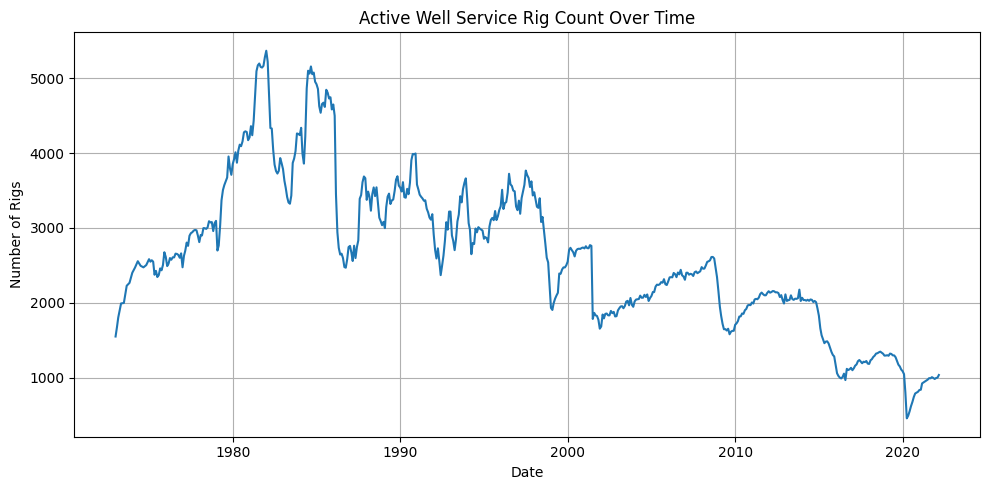

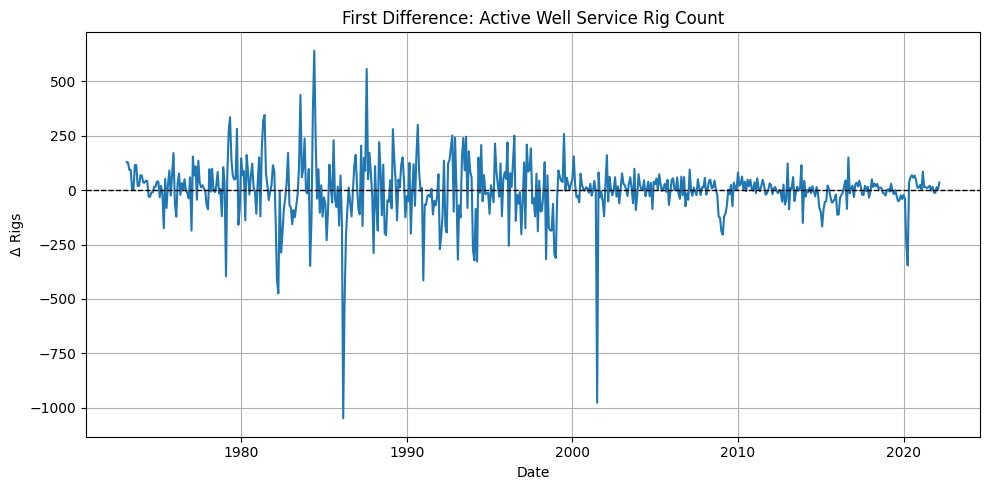

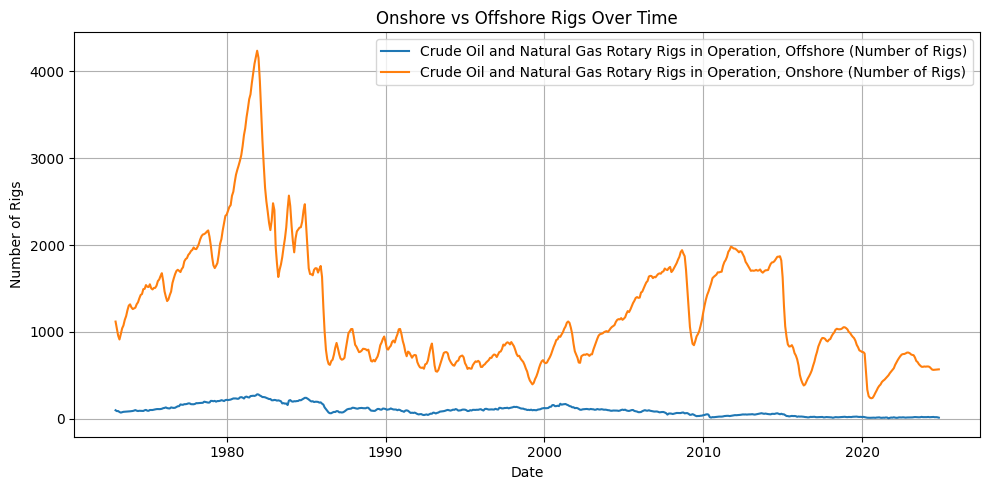

In [7]:
# Q3.1: load in data
df = pd.read_csv("drilling_rigs.csv")

print("Shape (rows, cols):", df.shape)

#answer the qualitative portion
print("The dataset has 623 observations and ten variables. Most rig count variables were read as numeric but the month column was imported as an object and had to be converted to a datetime. Cleaning involved parsing the date and ensuring rig count variables were numeric and handling null entries by putting them in NaN. One of month and time can be dropped since they contain the same thing")

# Q3.2: Types & cleaning
df["time"] = pd.to_datetime(df["Month"], format="mixed", errors="coerce")

for c in df.columns:   # Convert Month from object to datetime and coerce rig counts to nume
# Ensures time series operations work correctly and catches any non-numeric entries
    if c not in ["Month", "time"]:
        df[c] = pd.to_numeric(df[c], errors="coerce")

print("\nDtypes after cleaning:\n", df.dtypes)

def find_col(needle): #AI help used for def
    m = [c for c in df.columns if needle.lower() in c.lower()]
    if not m:
        raise ValueError(f"Column containing '{needle}' not found.")
    return m[0]

rig_total_col = find_col("Active Well Service Rig Count")
onshore_col  = find_col("Onshore")
offshore_col  = find_col("Offshore")

# Q3.3 Line plot of total rigs over time
plt.figure(figsize=(10,5))
plt.plot(df["time"], df[rig_total_col])
plt.title("Active Well Service Rig Count Over Time")
plt.xlabel("Date"); plt.ylabel("Number of Rigs"); plt.grid(True); plt.tight_layout()
plt.show()

#answer the qualitative portion
print("The active well service rig count shows strong syclical behavior over time. Rig counts rose sharply in the late 70s and 80s, and then a decline. Since then there has been boom bust cycles. Over the long run there is a downward trend. This suggests both decline and market vol")
# Q3.4 First difference of total rigs
df["rig_diff"] = df[rig_total_col].diff()

plt.figure(figsize=(10,5))
plt.plot(df["time"], df["rig_diff"])
plt.axhline(0, color="k", linestyle="--", linewidth=1)
plt.title("First Difference: Active Well Service Rig Count")
plt.xlabel("Date"); plt.ylabel("Δ Rigs"); plt.grid(True); plt.tight_layout()
plt.show()
#answer qualitative part
print("The first difference of the Active Well Service Rig Count flucuates around zero. The series is volatile especially in earlier decades. Over time, the maginature of vol has declined. This suggests the rif count adjusts in burst rather than smoothly, heavily influenced by busts and booms")
#Q3.5 Melt onshore vs offshore and plot
df_melt = df.melt(  #AI help used for def
    id_vars="time",
    value_vars=[onshore_col, offshore_col],
    var_name="Rig Type",
    value_name="Number of Rigs"
)
# Compare onshore vs offshore rig counts over time
# Onshore rigs dominate and fluctuate more, offshore rigs are fewer and more stable

plt.figure(figsize=(10,5))
for rig_type, sub in df_melt.groupby("Rig Type"):
    plt.plot(sub["time"], sub["Number of Rigs"], label=rig_type)
plt.title("Onshore vs Offshore Rigs Over Time")
plt.xlabel("Date"); plt.ylabel("Number of Rigs"); plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


